# Løsning og visualisering av bjelke med overheng

_Med utgangspunkt i forelesning 6, eksempel på notat, side 6._

In [55]:
import numpy as np


"""
Statisk løsning. Kan antas løst i forkant av forelesning.

Formål: bygge funksjoner M(x) og V(x) som kan ta inn et numpy-array av X-verdier.

Ikke antatt skrevet av studenter, men skrevet for å være lett å bruke i etterkant. Jeg gjør
to ting som ikke er forventet kunnskap for førsteklassestudenter:

- Bruker klasser til å regne ut konstanter så jeg kan eksponere V(x) og M(x) på en løsning
- Skriver vektoriserte løsninger for V(x) og M(x) slik at de kan fungere direkte med numpy,
  og kjøre raskt.

Kunnskapen er ikke nødvendig for å bruke løsningen.
"""


class Solve:
    """Solve example on page 7 of lecture 6.
    
    Conventions:    
        x = 0 in A (left)
        Positive V(x): ↓▯↑
        Positive M(x): ⤸▯⤹
    
    Constants q and F are taken as parameters. Then we can run the solver both with and 
    without SI units.
    """
    
    def __init__(self, q, L):
        self.q = q
        self.L = L
        self.F = q * L
        self.R_tot = self.F + q*2*L

        # Solve for moment equilibrium around A
        self.M_A = q*2*L*L + self.F*3*L

        # B_y must balance M_A
        self.B_y = self.M_A / (2*L)

        # Require total force equilibrium
        self.A_y = self.R_tot - self.B_y
    
    def V(self, x):
        """
        Positive V(x): ↓▯↑
        """
        after_B_y = x > 2*self.L
        
        return (
            -self.A_y + self.q*x
            - after_B_y * self.B_y
        )
    
    def M(self, x):
        """
        Positive M(x): ⤸▯⤹
        """
        before_B_y = x < 2*self.L
        after_B_y = np.logical_not(before_B_y)
        
        return (
            -self.A_y*x
            + before_B_y * self.q*x*x/2
            + after_B_y * (
                self.q*2*self.L * (x - self.L)
                - self.B_y * (x - 2*self.L)
            )
        )

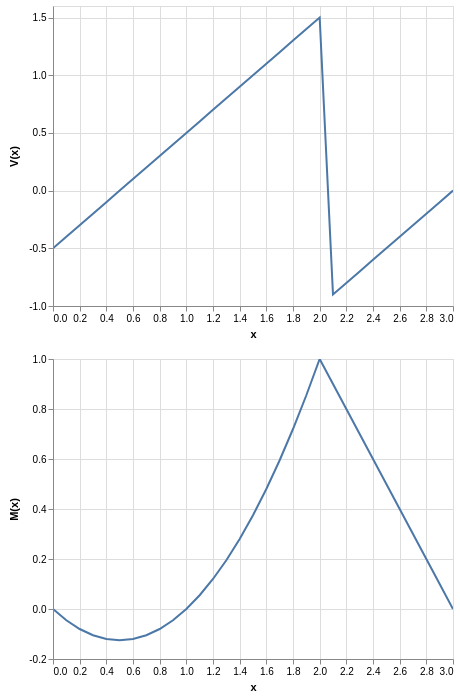

In [57]:
# Use unit load and unit length to get dimensionless solutions
solution = Solve(1, 1)
xs = np.linspace(0, 3, 31)

# Now, plot it.
import altair as alt
import pandas as pd

"""
A DataFrame is a columnar table:
 x   V(x)    M(x)
0.0  -0.5   0.000
0.1  -0.4  -0.045
0.2  -0.3  -0.080
"""
source = pd.DataFrame({
    'x': xs,
    'V(x)': solution.V(xs),
    'M(x)': solution.M(xs)
})

# Now, display both V(x) and M(x) with x-axes in sync

base = alt.Chart().mark_line().interactive()

chart = alt.vconcat(
    base.encode(x="x", y="V(x)"),
    base.encode(x="x", y="M(x)"),
    data=source
)
chart

# In Github, these render as static images. In Jupyter Lab and
# as exported to HTML, these are interactive. You can then pan
# and zoom in the plot.